<a href="https://colab.research.google.com/github/Fazlibeqir/Timski-Proekt/blob/main/train_v3_bigger_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q gdown pillow requests ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 28.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/Dataset/cleaned_dataset.zip'

ls: cannot access '/content/drive/My Drive/Dataset/cleaned_dataset.zip': No such file or directory


In [ ]:
import sys
import os
import shutil
import zipfile
import torch
import pandas as pd
from ultralytics import YOLO
from PIL import Image
from tqdm import tqdm

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
module_path = '/content/drive/MyDrive/Insect Detection/utils'
sys.path.append(module_path)

In [ ]:
!ls '/content/drive/MyDrive/Insect Detection/utils'


common_funcs.py  __init__.py  __pycache__


In [ ]:
import sys
module_path = '/content/drive/MyDrive/Insect Detection/utils'
if module_path not in sys.path:
    sys.path.append(module_path)


In [ ]:
print('/content/drive/MyDrive/Insect Detection/utils' in sys.path)
# !touch "/content/drive/MyDrive/Insect Detection/utils/__init__.py"

True


In [ ]:
from common_funcs import (
    get_gbif_images,
    download_image,
    folder_has_enough_images,
    count_images,
    split_and_download_images
)

In [ ]:
!ls -lh /content/drive/MyDrive/Insect\ Detection/

total 4.2G
-rw------- 1 root root 4.2G Jun  9 17:42 cleaned_dataset.zip
-rw------- 1 root root  276 Jun  9 17:20 compare_all_versions.ipynb
-rw------- 1 root root 1.6K Jun 10 17:22 compared_models.ipynb
-rw------- 1 root root  15K May 30 22:00 fetch_data.ipynb
-rw------- 1 root root  324 May 29 23:17 test_and_eval.ipynb
-rw------- 1 root root 8.6K Jun 11 17:12 train_v1_baseline.ipynb
-rw------- 1 root root  324 May 29 23:16 train_v2_augmented.ipynb
-rw------- 1 root root 6.8K Jun 11 17:12 train_v3_bigger_model.ipynb
drwx------ 3 root root 4.0K May 28 16:56 utils
-rw------- 1 root root 909K May 28 16:44 YOLO8.ipynb


In [ ]:
!cp /content/drive/MyDrive/Insect\ Detection/cleaned_dataset.zip .

In [ ]:
!unzip -q cleaned_dataset.zip -d .

In [ ]:
from pathlib import Path

#dataset is extracted into /content/dataset/content/dataset
base_path = Path("/content/dataset/content/dataset")
for split in ['train','test', 'val']:
    split_path = base_path / split
    image_count = len(list(split_path.rglob('*.jpg')))
    print(f"{split.capitalize()} images: {image_count}")

Train images: 1766
Test images: 384
Val images: 391


In [ ]:

model = YOLO("yolov8x-cls.pt")

model.train(
    data=base_path,
    epochs=100,
    imgsz=224,
    name="yolov8x-cls_bigger",
    patience=10,
    device=0 if torch.cuda.is_available() else 'cpu',
    batch=64,
    workers=4
)


100%|██████████| 110M/110M [00:00<00:00, 117MB/s]


Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/content/dataset, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8x-cls_bigger, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pos

100%|██████████| 5.35M/5.35M [00:00<00:00, 78.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 38.2±21.6 MB/s, size: 427.4 KB)


train: Scanning /content/dataset/content/dataset/train... 3514 images, 0 corrupt: 100%|██████████| 3514/3514 [00:05<00:00, 662.51it/s]

train: New cache created: /content/dataset/content/dataset/train.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1485.1±1329.2 MB/s, size: 1448.8 KB)


val: Scanning /content/dataset/content/dataset/val... 748 images, 0 corrupt: 100%|██████████| 748/748 [00:00<00:00, 3829.86it/s]

val: New cache created: /content/dataset/content/dataset/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000161, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/yolov8x-cls_bigger
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      4.88G      4.091         64        224:   4%|▎         | 2/55 [00:11<04:04,  4.62s/it]


100%|██████████| 755k/755k [00:00<00:00, 24.8MB/s]
      1/100      4.88G      4.067         58        224: 100%|██████████| 55/55 [02:13<00:00,  2.43s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:18<00:00,  3.01s/it]

                   all     0.0468      0.184



      Epoch    GPU_mem       loss  Instances       Size


      2/100      5.75G      3.798         58        224: 100%|██████████| 55/55 [02:04<00:00,  2.26s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.48s/it]

                   all       0.21      0.464



      Epoch    GPU_mem       loss  Instances       Size


      3/100      5.78G      3.224         58        224: 100%|██████████| 55/55 [02:02<00:00,  2.23s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.26s/it]

                   all      0.337      0.674



      Epoch    GPU_mem       loss  Instances       Size


      4/100       5.8G      2.395         58        224: 100%|██████████| 55/55 [02:06<00:00,  2.30s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.36s/it]

                   all      0.448      0.773



      Epoch    GPU_mem       loss  Instances       Size


      5/100      5.83G      1.757         58        224: 100%|██████████| 55/55 [02:03<00:00,  2.24s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.66s/it]

                   all      0.539      0.856



      Epoch    GPU_mem       loss  Instances       Size


      6/100      6.13G      1.348         58        224: 100%|██████████| 55/55 [02:06<00:00,  2.31s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.44s/it]

                   all      0.596      0.878



      Epoch    GPU_mem       loss  Instances       Size


      7/100      6.41G      1.036         58        224: 100%|██████████| 55/55 [02:06<00:00,  2.30s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.46s/it]

                   all      0.627      0.893



      Epoch    GPU_mem       loss  Instances       Size


      8/100      6.73G     0.8084         58        224: 100%|██████████| 55/55 [02:06<00:00,  2.30s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.58s/it]

                   all       0.65      0.901



      Epoch    GPU_mem       loss  Instances       Size


      9/100      7.06G     0.6251         58        224: 100%|██████████| 55/55 [02:06<00:00,  2.30s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.25s/it]

                   all      0.674      0.914



      Epoch    GPU_mem       loss  Instances       Size


     10/100      7.38G     0.4949         58        224: 100%|██████████| 55/55 [02:06<00:00,  2.31s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.27s/it]

                   all      0.662       0.92



      Epoch    GPU_mem       loss  Instances       Size


     11/100      5.26G     0.4079         58        224: 100%|██████████| 55/55 [02:04<00:00,  2.26s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.54s/it]

                   all      0.676      0.924



      Epoch    GPU_mem       loss  Instances       Size


     12/100      5.26G     0.3677         58        224: 100%|██████████| 55/55 [02:04<00:00,  2.26s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.64s/it]

                   all      0.687      0.921



      Epoch    GPU_mem       loss  Instances       Size


     13/100      5.46G     0.3326         58        224: 100%|██████████| 55/55 [02:05<00:00,  2.29s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.52s/it]

                   all      0.693      0.926



      Epoch    GPU_mem       loss  Instances       Size


     14/100      5.84G     0.3047         58        224: 100%|██████████| 55/55 [02:02<00:00,  2.22s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.32s/it]

                   all      0.701      0.934



      Epoch    GPU_mem       loss  Instances       Size


     15/100      6.14G      0.241         58        224: 100%|██████████| 55/55 [02:06<00:00,  2.30s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:12<00:00,  2.05s/it]

                   all      0.697      0.926



      Epoch    GPU_mem       loss  Instances       Size


     16/100      6.48G     0.2417         58        224: 100%|██████████| 55/55 [02:04<00:00,  2.26s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.50s/it]

                   all      0.698      0.928



      Epoch    GPU_mem       loss  Instances       Size


     17/100      6.82G     0.2032         58        224: 100%|██████████| 55/55 [02:06<00:00,  2.29s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:12<00:00,  2.15s/it]

                   all      0.721      0.928



      Epoch    GPU_mem       loss  Instances       Size


     18/100      7.06G     0.1972         58        224: 100%|██████████| 55/55 [02:02<00:00,  2.22s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.41s/it]

                   all      0.709      0.928



      Epoch    GPU_mem       loss  Instances       Size


     19/100      7.38G     0.1938         58        224: 100%|██████████| 55/55 [02:04<00:00,  2.26s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:12<00:00,  2.08s/it]

                   all      0.709      0.925



      Epoch    GPU_mem       loss  Instances       Size


     20/100      5.31G      0.188         58        224: 100%|██████████| 55/55 [02:02<00:00,  2.22s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.67s/it]

                   all      0.709      0.924



      Epoch    GPU_mem       loss  Instances       Size


     21/100      5.31G     0.1763         58        224: 100%|██████████| 55/55 [02:02<00:00,  2.22s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.78s/it]

                   all       0.71      0.925



      Epoch    GPU_mem       loss  Instances       Size


     22/100      5.48G     0.1597         58        224: 100%|██████████| 55/55 [01:59<00:00,  2.17s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.56s/it]

                   all      0.725      0.932



      Epoch    GPU_mem       loss  Instances       Size


     23/100      5.84G     0.1707         58        224: 100%|██████████| 55/55 [01:58<00:00,  2.15s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:12<00:00,  2.08s/it]

                   all      0.735       0.93



      Epoch    GPU_mem       loss  Instances       Size


     24/100      6.15G     0.1476         58        224: 100%|██████████| 55/55 [02:05<00:00,  2.29s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.22s/it]

                   all      0.742      0.934



      Epoch    GPU_mem       loss  Instances       Size


     25/100      6.51G     0.1517         58        224: 100%|██████████| 55/55 [01:57<00:00,  2.14s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.72s/it]

                   all       0.73      0.922



      Epoch    GPU_mem       loss  Instances       Size


     26/100      6.82G     0.1384         58        224: 100%|██████████| 55/55 [02:03<00:00,  2.25s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.37s/it]

                   all      0.722      0.924



      Epoch    GPU_mem       loss  Instances       Size


     27/100      7.11G     0.1253         58        224: 100%|██████████| 55/55 [02:03<00:00,  2.24s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.39s/it]

                   all      0.717      0.925



      Epoch    GPU_mem       loss  Instances       Size


     28/100      7.49G     0.1364         58        224: 100%|██████████| 55/55 [02:03<00:00,  2.24s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.46s/it]

                   all      0.742      0.925



      Epoch    GPU_mem       loss  Instances       Size


     29/100      5.29G     0.1282         58        224: 100%|██████████| 55/55 [02:06<00:00,  2.31s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:12<00:00,  2.07s/it]

                   all      0.729      0.925



      Epoch    GPU_mem       loss  Instances       Size


     30/100      5.29G     0.1165         58        224: 100%|██████████| 55/55 [02:08<00:00,  2.34s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.38s/it]

                   all      0.723      0.921



      Epoch    GPU_mem       loss  Instances       Size


     31/100      5.52G     0.1237         58        224: 100%|██████████| 55/55 [02:06<00:00,  2.31s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.43s/it]

                   all      0.719      0.926



      Epoch    GPU_mem       loss  Instances       Size


     32/100      5.82G     0.1313         58        224: 100%|██████████| 55/55 [02:02<00:00,  2.23s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.41s/it]

                   all      0.723      0.925



      Epoch    GPU_mem       loss  Instances       Size


     33/100      6.14G     0.1194         58        224: 100%|██████████| 55/55 [02:09<00:00,  2.35s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.42s/it]

                   all      0.718      0.924



      Epoch    GPU_mem       loss  Instances       Size


     34/100      6.41G     0.1095         58        224: 100%|██████████| 55/55 [02:07<00:00,  2.32s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.62s/it]

                   all      0.729      0.925
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 24, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



34 epochs completed in 1.353 hours.
Optimizer stripped from runs/classify/yolov8x-cls_bigger/weights/last.pt, 112.6MB
Optimizer stripped from runs/classify/yolov8x-cls_bigger/weights/best.pt, 112.6MB

Validating runs/classify/yolov8x-cls_bigger/weights/best.pt...
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8x-cls summary (fused): 54 layers, 56,197,498 parameters, 0 gradients, 153.9 GFLOPs
train: /content/dataset/content/dataset/train... found 3514 images in 58 classes ✅ 
ERROR ❌ val: /content/dataset/content/dataset/val... found 748 images in 57 classes (requires 58 classes, not 57)
ERROR ❌ test: /content/dataset/content/dataset/test... found 748 images in 57 classes (requires 58 classes, not 57)


               classes   top1_acc   top5_acc:  33%|███▎      | 2/6 [00:01<00:02,  1.36it/s]


  0%|          | 0.00/22.2M [00:00<?, ?B/s]
 37%|███▋      | 8.25M/22.2M [00:00<00:00, 86.5MB/s]
100%|██████████| 22.2M/22.2M [00:00<00:00, 95.4MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:18<00:00,  3.13s/it]


                   all      0.742      0.934
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/yolov8x-cls_bigger


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b3a29546e50>
curves: []
curves_results: []
fitness: 0.8382352888584137
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7419785857200623, 'metrics/accuracy_top5': 0.9344919919967651, 'fitness': 0.8382352888584137}
save_dir: PosixPath('runs/classify/yolov8x-cls_bigger')
speed: {'preprocess': 0.09117749866095558, 'inference': 2.1588546270045468, 'loss': 0.00011984224557942889, 'postprocess': 0.00030128609326695785}
task: 'classify'
top1: 0.7419785857200623
top5: 0.9344919919967651

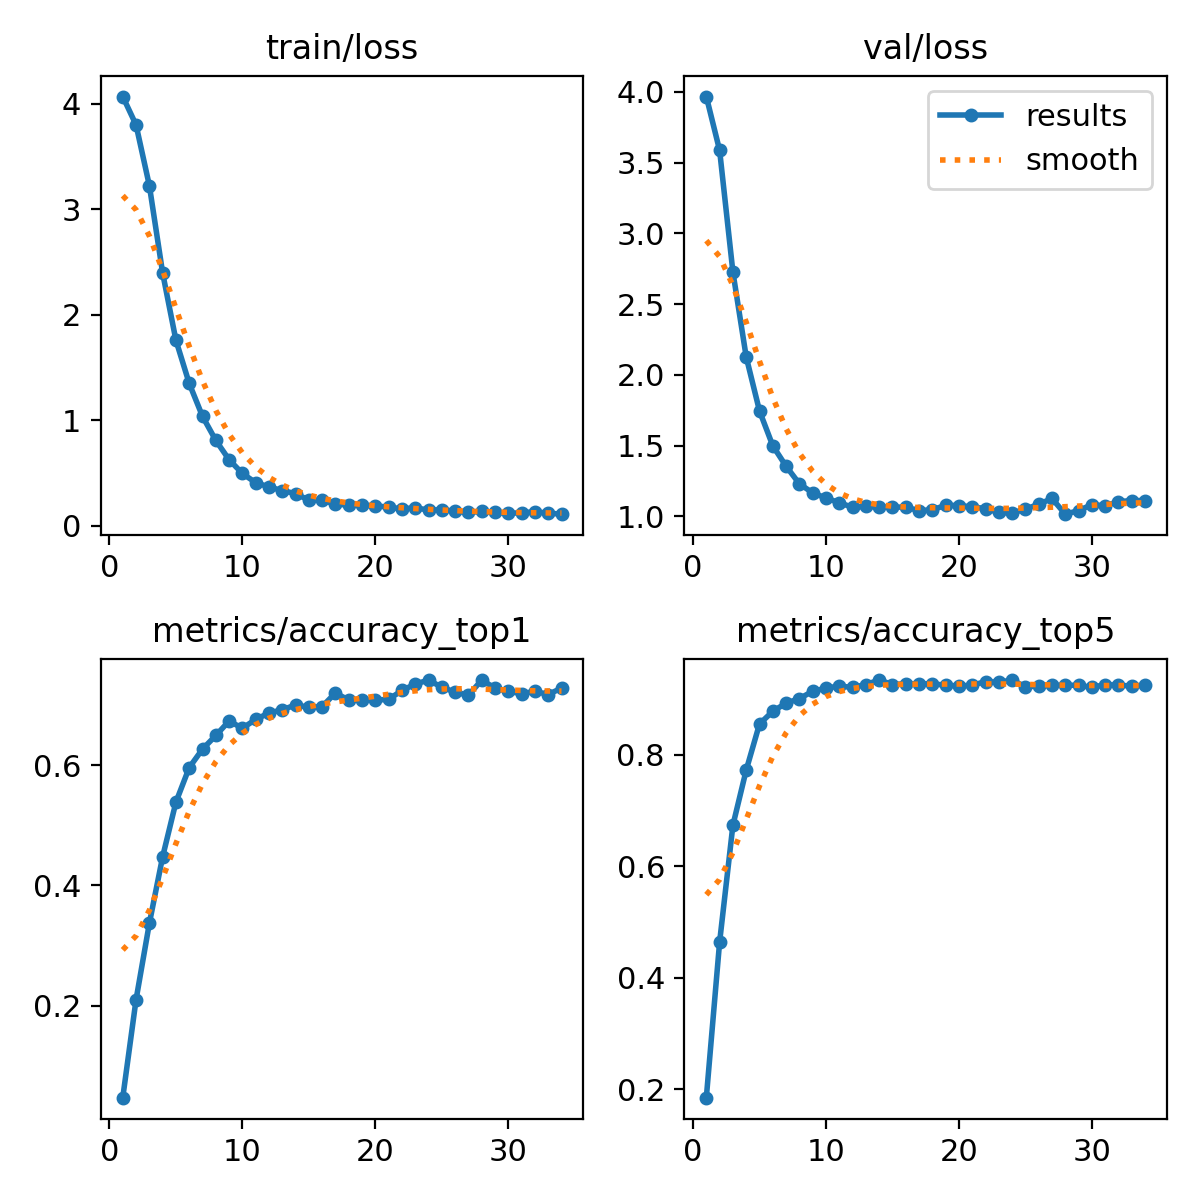

In [ ]:
from IPython.display import Image, display
results_dir = Path("runs/classify/yolov8x-cls_bigger")
display(Image(filename=results_dir / "results.png"))

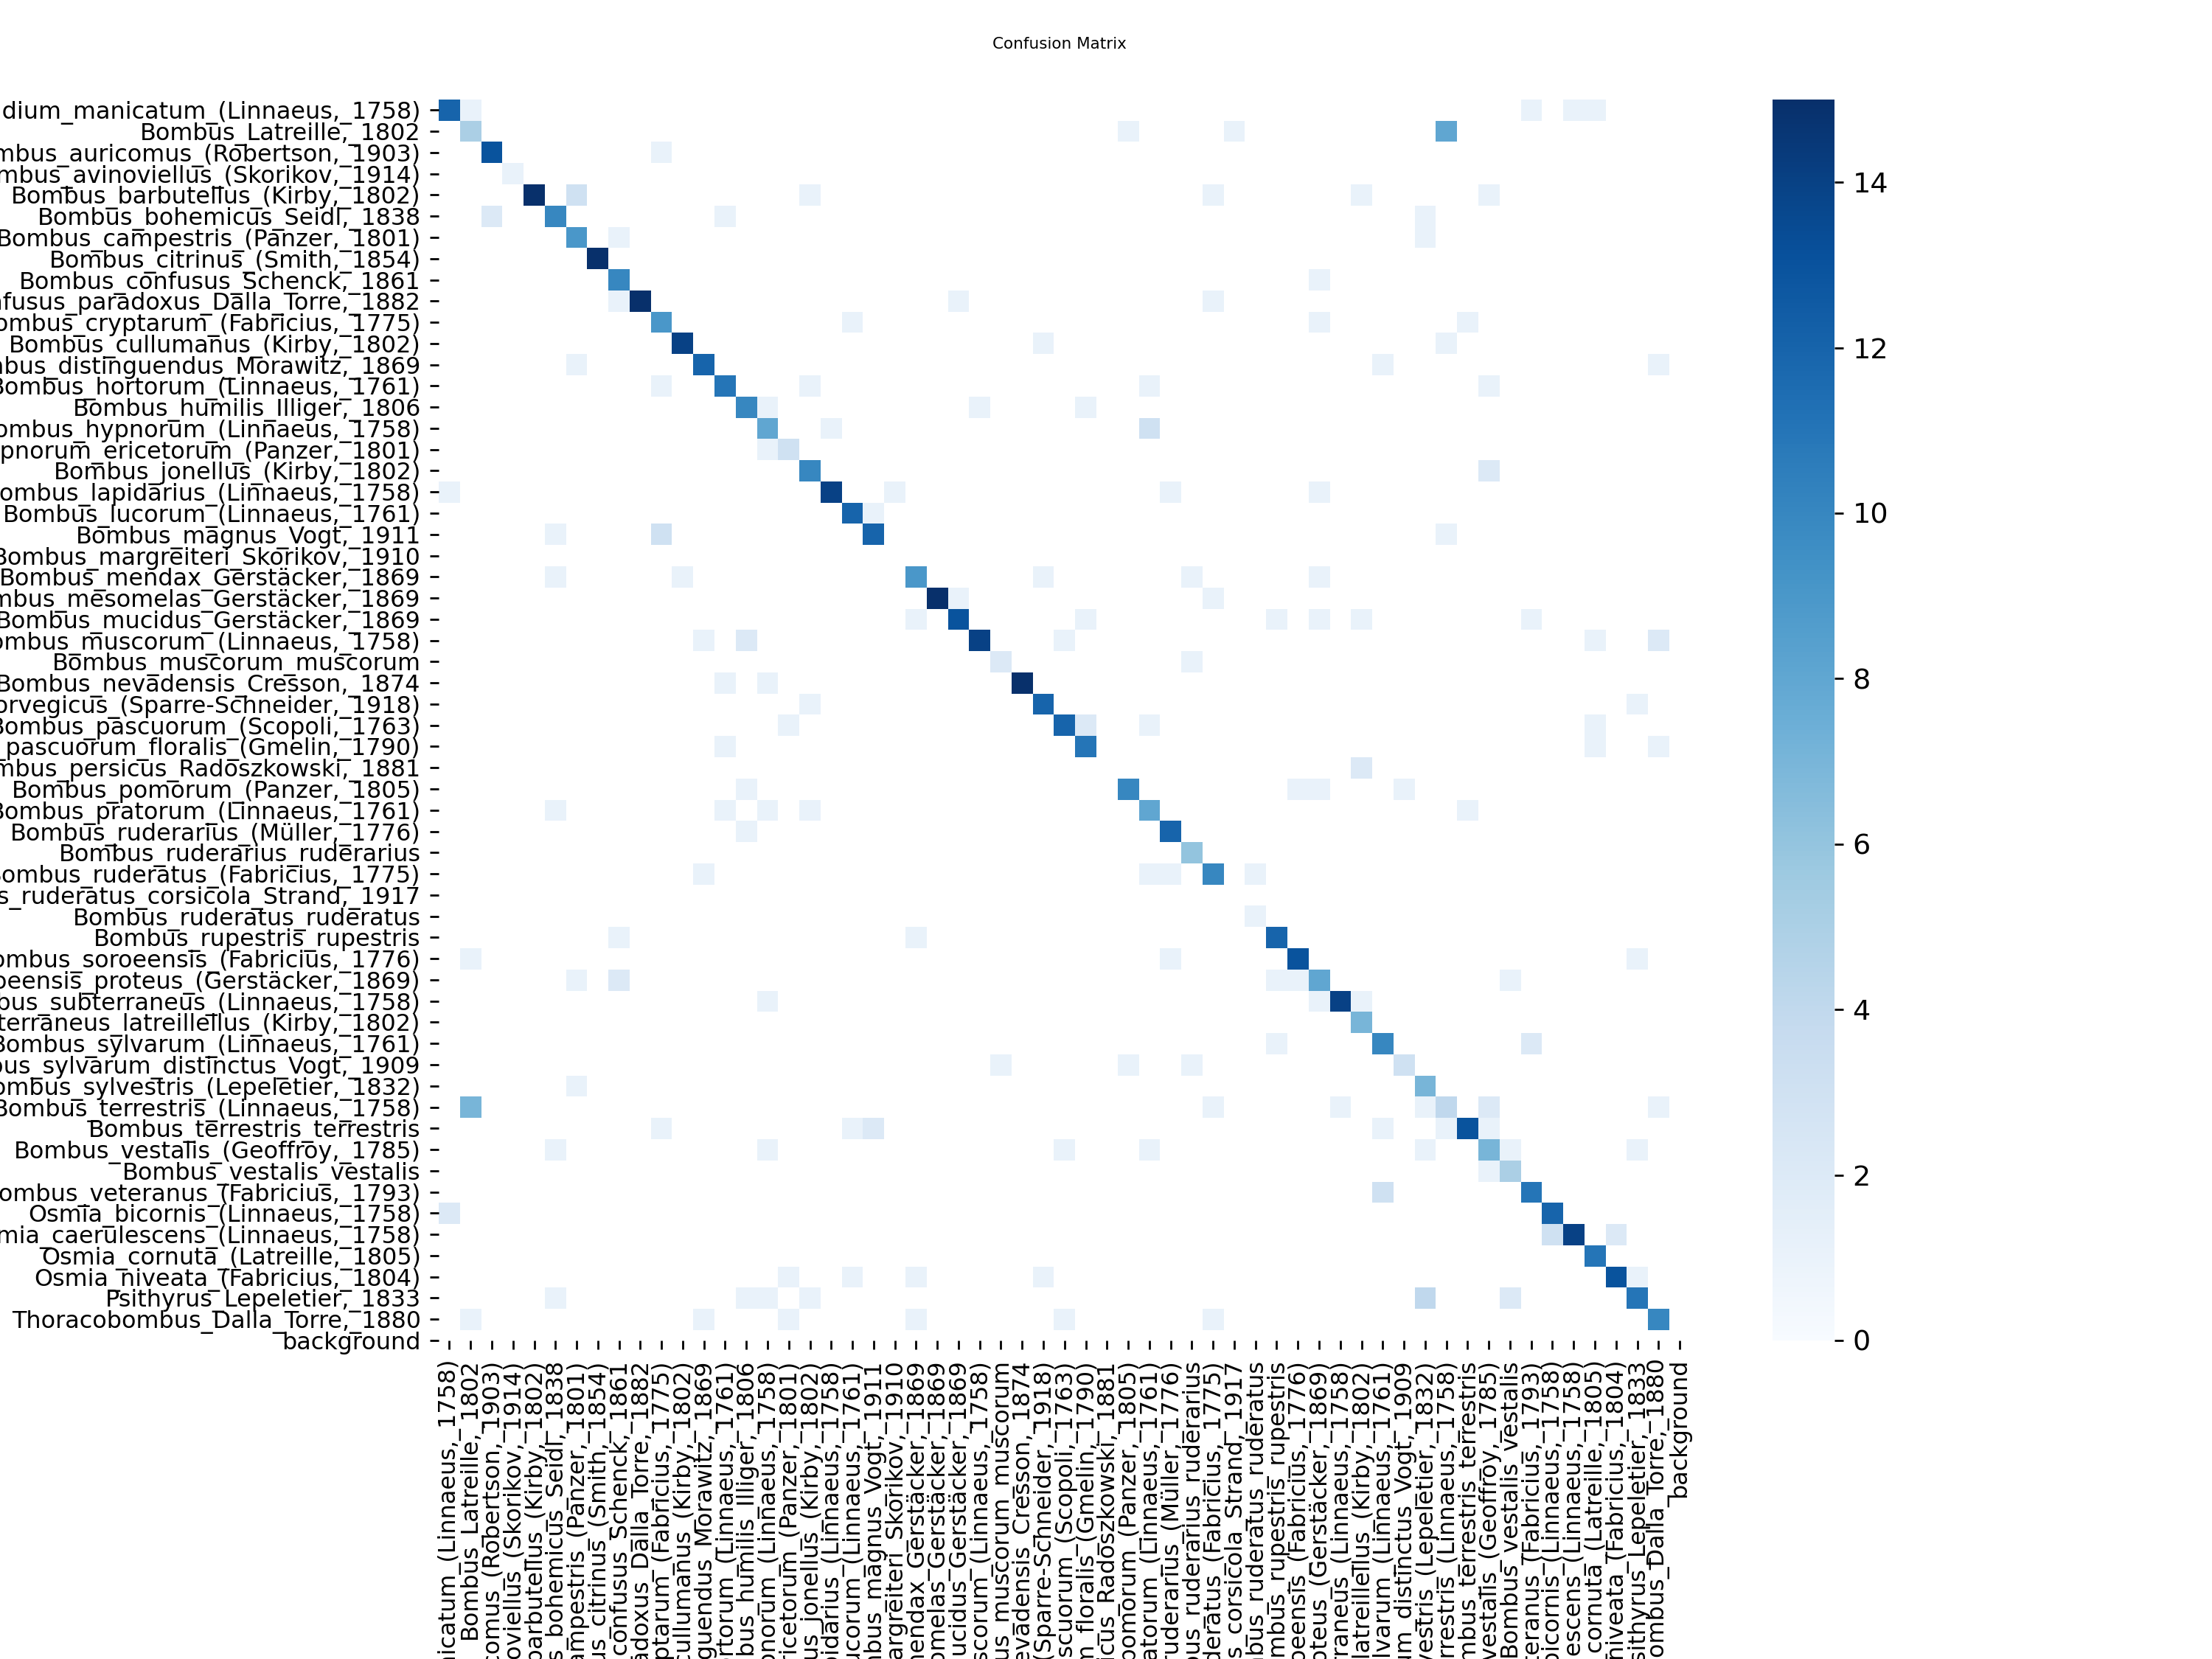

In [ ]:
display(Image(filename=results_dir / "confusion_matrix.png"))

In [ ]:
!cp /content/runs/classify/yolov8x-cls_bigger/results.csv /content/drive/MyDrive/Insect\ Detection/utils/resultsV3.csv

In [ ]:
!cp /content/runs/classify/yolov8s-cls_baseline/weights/best.pt /content/drive/MyDrive/Insect\ Detection/utils/bestV3.pt